In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import toml
from plotnine import (
    aes,
    element_text,
    facet_grid,
    geom_bar,
    geom_point,
    ggplot,
    ggsave,
    theme,
    theme_bw,
    xlim,
    ylim,
)

In [2]:
# set paths and load data
path = pathlib.Path("../../Data/clean/Plate2/nELISA_plate_430420_PBMC_clean.parquet")
toml_path = pathlib.Path("../../../1.Exploratory_Data_Analysis/utils/params.toml")

df = pd.read_parquet(path)
params = toml.load(toml_path)
list_of_treatments = params["list_of_treatments"]["treatments"]

In [3]:
print(df.columns.to_list())

['plate_name', 'plate_barcode', 'position_x', 'cell_type', 'incubation inducer', 'inhibitor', 'inhibitor_concentration_value', 'inhibitor_concentration_unit', 'inhibitor_concentration', 'inducer1', 'inducer1_concentration_value', 'inducer1_concentration_unit', 'inducer1_concentration', 'inducer2', 'inducer2_concentration_value', 'inducer2_concentration_unit', 'inducer2_concentration', 'plate_position', 'user_plate_id', 'user_sample_id', 'position_y', 'nelisa_sample_dilution_fold', 'nelisa_sample_comments', 'nelisa_sample_pass_qc', 'nelisa_sample_id', 'Activin A [NSU]', 'AITRL (GITR Ligand) [NSU]', 'Amphiregulin [NSU]', 'Amyloid beta [NSU]', 'APRIL [NSU]', 'BAFF [NSU]', 'BCMA (TNFRSF17) [NSU]', 'BDNF [NSU]', 'BMP2 [NSU]', 'BMP3 [NSU]', 'BMP4 [NSU]', 'BMP6 [NSU]', 'BMP7 [NSU]', 'BMP9 [NSU]', 'C5_C5a [NSU]', 'Calbindin [NSU]', 'CCL1 [NSU]', 'CCL11 [NSU]', 'CCL13 [NSU]', 'CCL15 [NSU]', 'CCL16 [NSU]', 'CCL17 [NSU]', 'CCL18 [NSU]', 'CCL19 [NSU]', 'CCL2 [NSU]', 'CCL20 [NSU]', 'CCL21 [NSU]', '

In [4]:
# output path for the treatment df
output_path = pathlib.Path(
    f"./results/PBMC_all_cytokine_values_per_treatment_per_well.csv"
)
df.to_csv(output_path, index=False)

/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 4 in image.
/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ./figures/TNF_alpha_IL-1_beta_scatter_plot.png


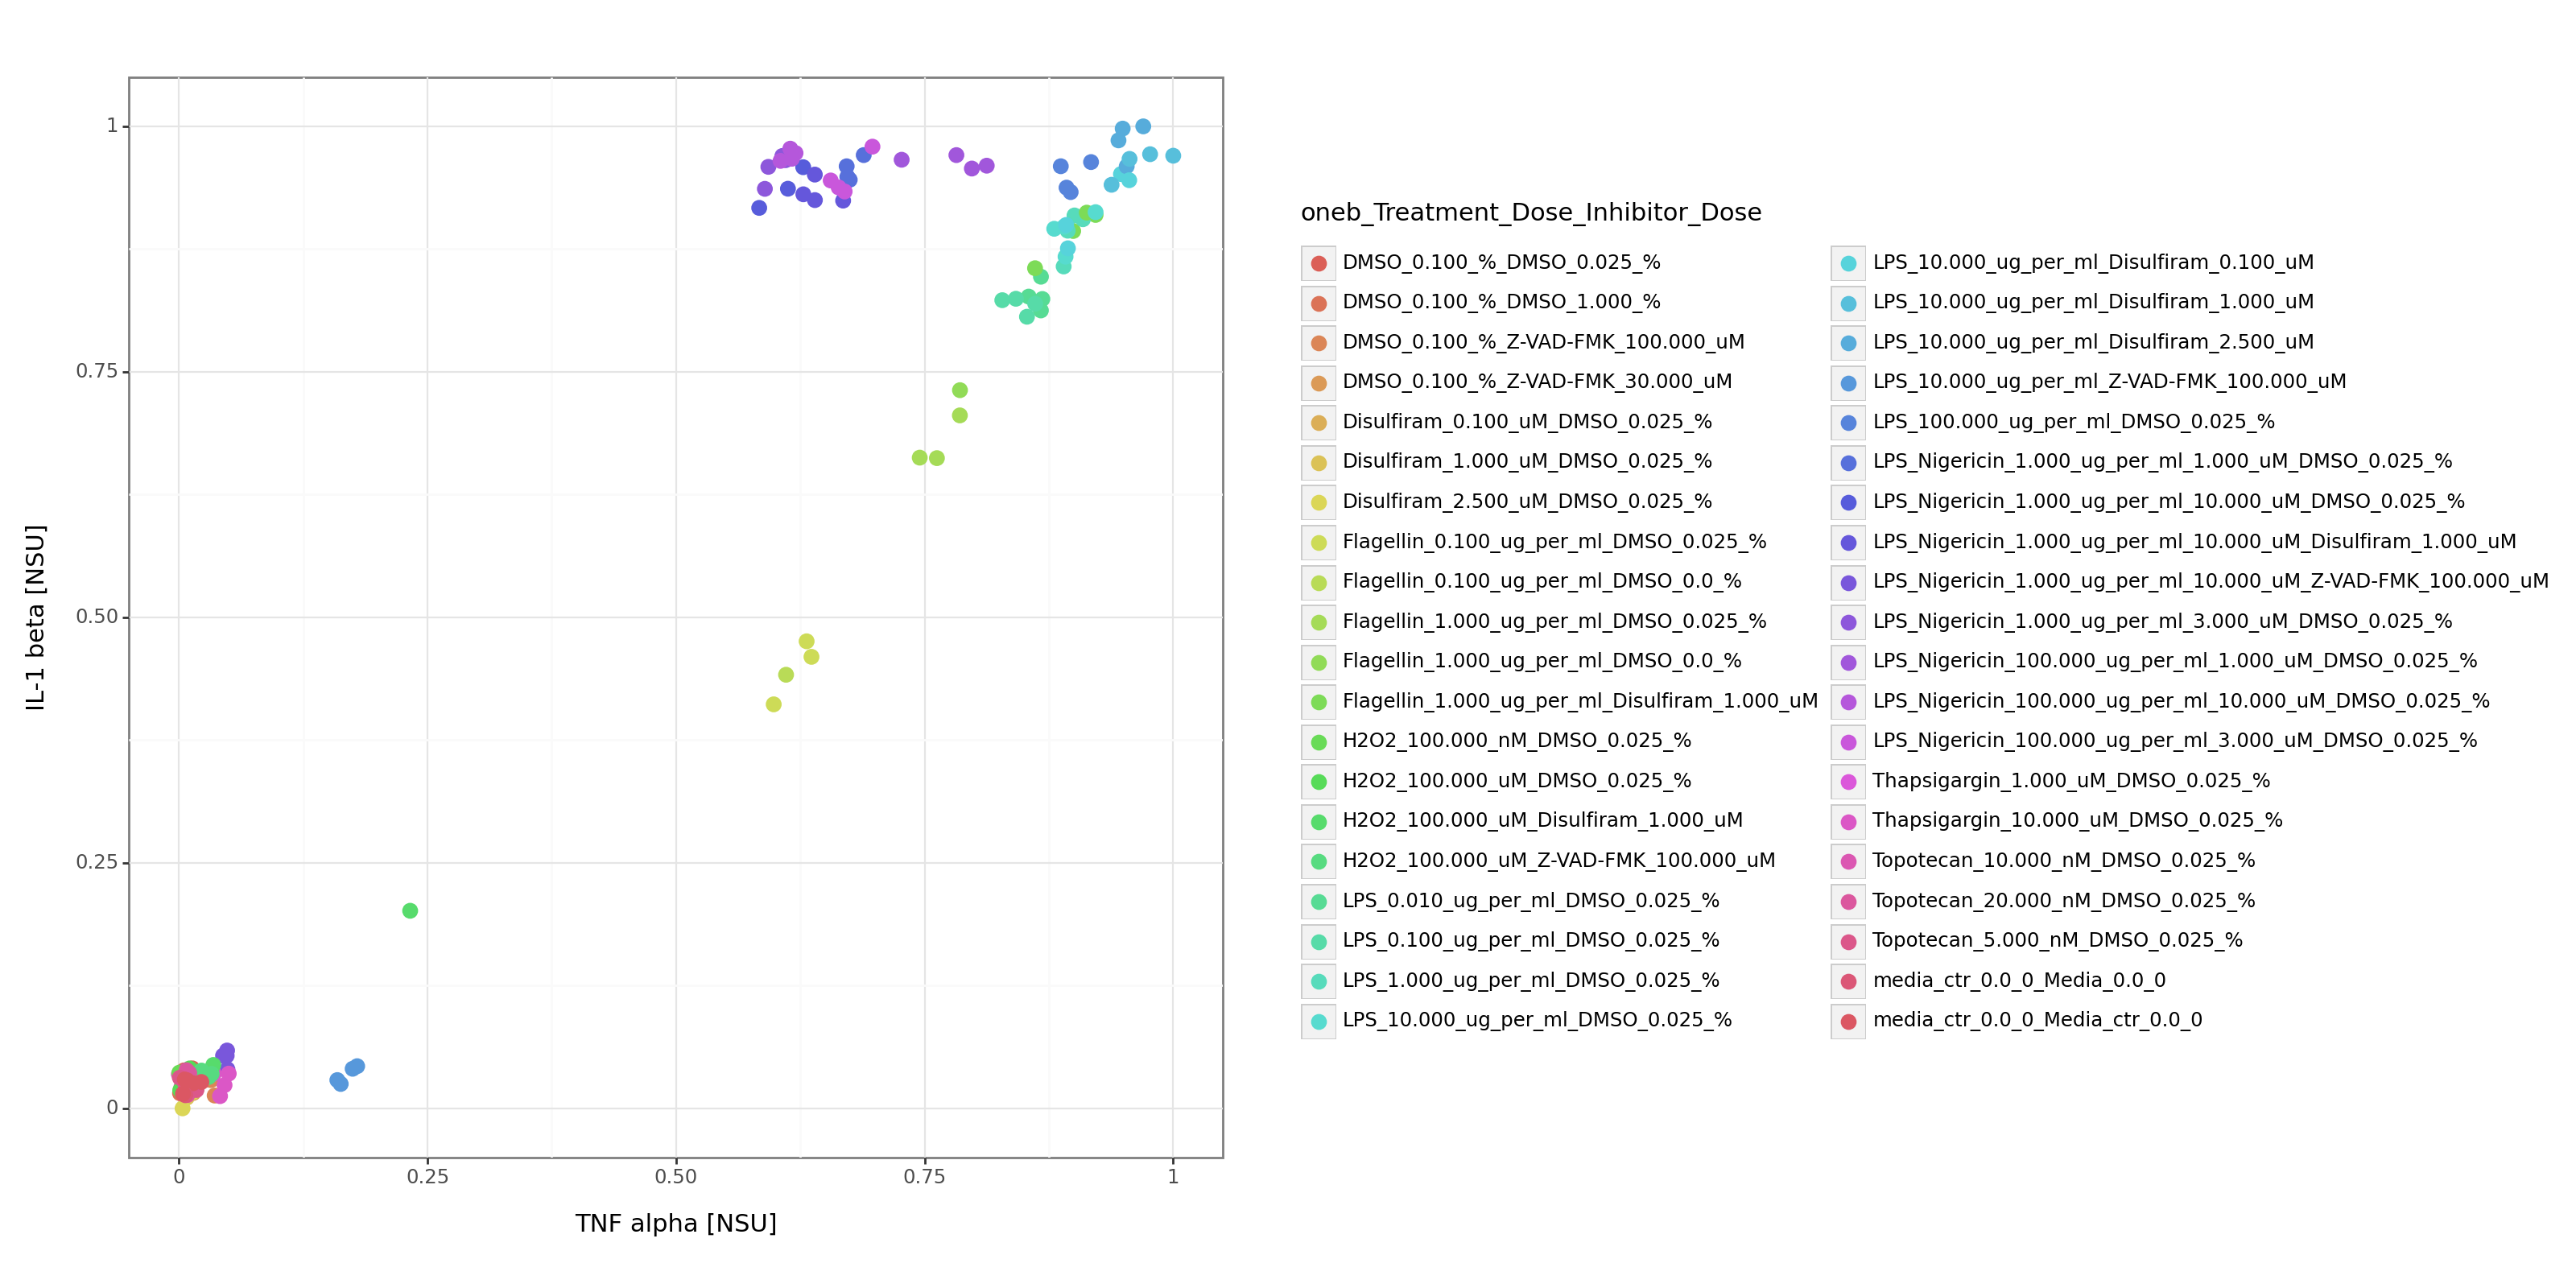

<Figure Size: (1600 x 800)>

In [5]:
# plot scatter plot of all the treatment groups for IL-1 beta

p = (
    ggplot(
        df,
        aes(
            x="TNF alpha [NSU]",
            y="IL-1 beta [NSU]",
            color="oneb_Treatment_Dose_Inhibitor_Dose",
        ),
    )
    + geom_point(size=3)
    + theme_bw()
    + ylim(0, 1)
    + xlim(0, 1)
)

ggplot.save(
    p,
    filename="./figures/TNF_alpha_IL-1_beta_scatter_plot.png",
    width=6,
    height=4,
    units="in",
    dpi=300,
)
p = p + theme(figure_size=(16, 8))
p

In [6]:
df_treatment = df.drop(columns=["position_x", "fourb_Treatment_Dose_Inhibitor_Dose"])
df_treatment = df_treatment.melt(
    id_vars=["oneb_Treatment_Dose_Inhibitor_Dose"],
    value_vars=df_treatment.columns.to_list()[1:],
    var_name="Cytokine",
    value_name="Cytokine_Value",
)

In [7]:
# outpath for the melted df
output_path = pathlib.Path(
    f"./results/PBMC_all_cytokine_values_per_treatment_per_well_melted.csv"
)
df_treatment.to_csv(output_path, index=False)